In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Car details v3.csv') #reading the dataset
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
df.dropna(inplace=True, axis=0, how='any')
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# removing suffixes from the values in columns
df['mileage']=df['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
df['mileage']=df['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
df['engine']=df['engine'].replace(' CC','',regex=True).str.replace(',', '')
df['max_power']=df['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

In [ ]:
df['mileage'] = pd.to_numeric(df['mileage'])
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'] = pd.to_numeric(df['max_power'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [ ]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage,0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


<Axes: xlabel='year', ylabel='count'>

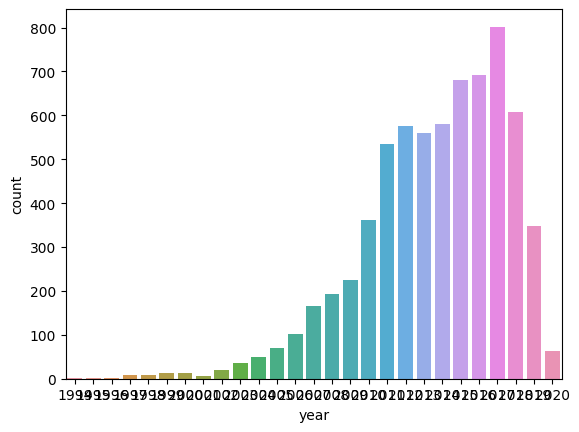

In [ ]:
sns.countplot(x='year',data=df) #displaying number of records wrt year

<ipython-input-6-fa54caadb05d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-6-fa54caadb05d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

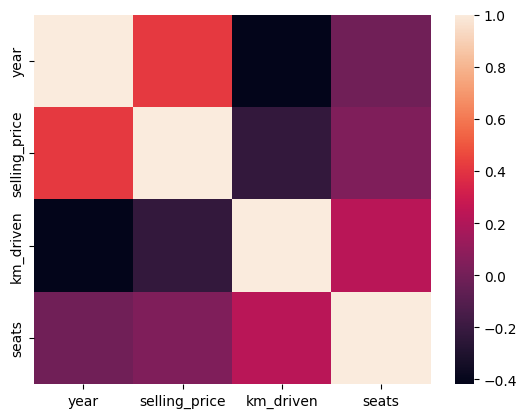

In [ ]:
#correlation heatmap to track how different parameters of the data on cars are related
df.corr()
sns.heatmap(df.corr())


<Axes: xlabel='year', ylabel='selling_price'>

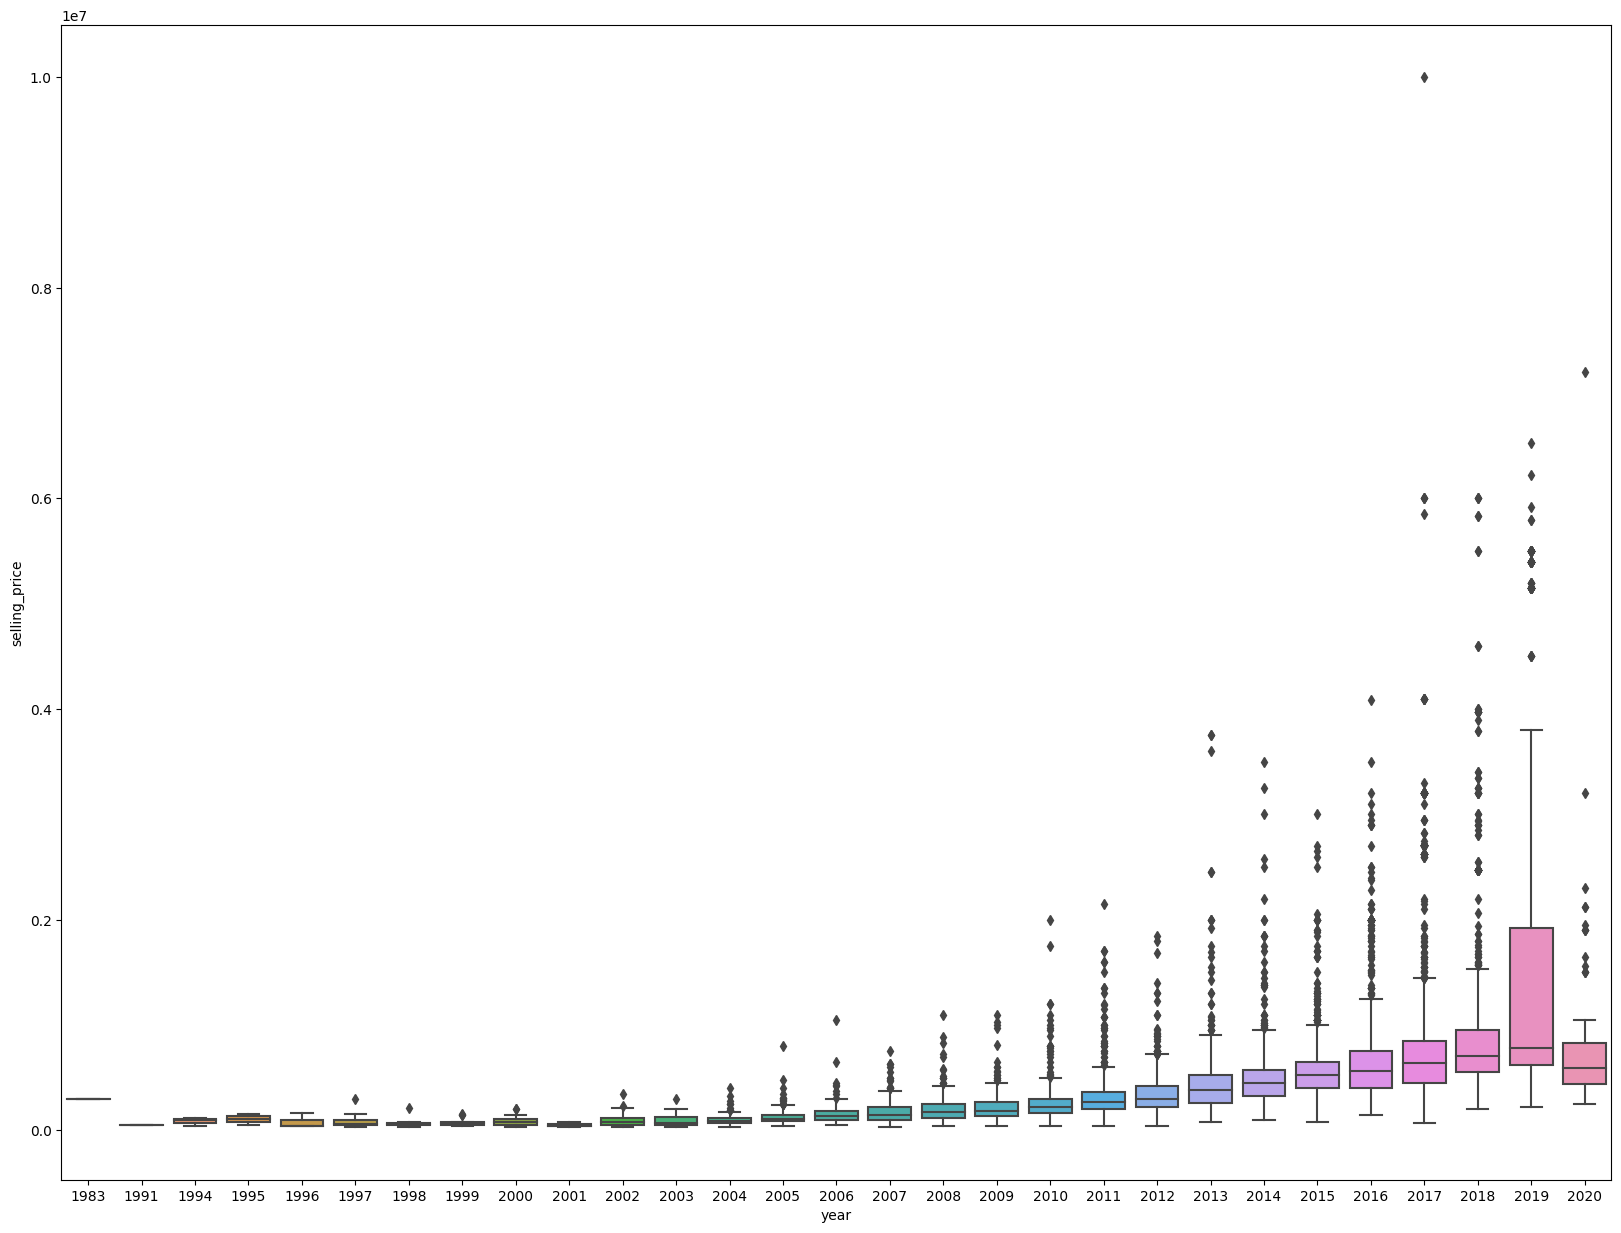

In [ ]:
#boxplot of selling price and year (older the car, lower the selling price)
plt.subplots(figsize=(20,15))
sns.boxplot(x=df['year'], y=df['selling_price'])

<ipython-input-12-6db8b7362f06>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['km_driven'].dropna(),kde=True)


<Axes: xlabel='km_driven', ylabel='Density'>

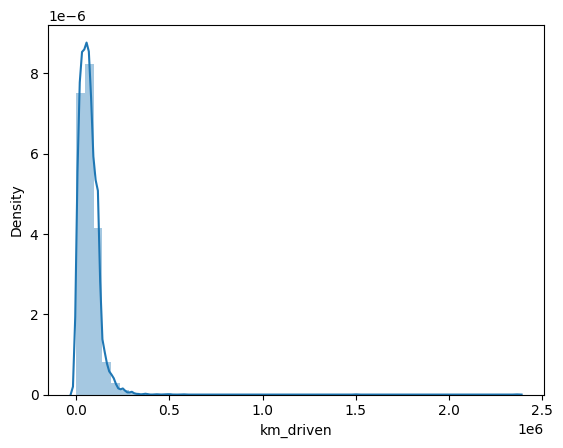

In [ ]:
sns.distplot(df['km_driven'].dropna(),kde=True)

In [ ]:
df.columns = df.columns.str.rstrip(' kmpl')

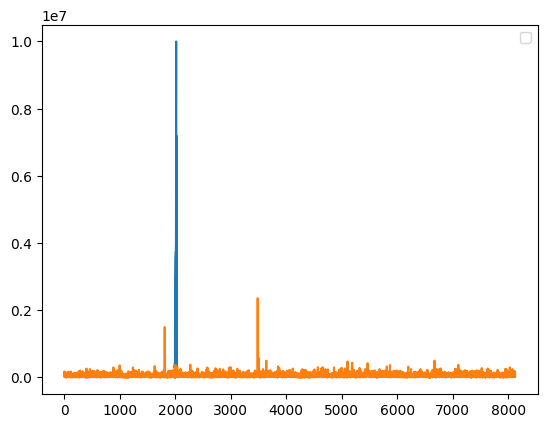

In [ ]:
plt.plot(df['year'],df['selling_price'],df['km_driven']	)
plt.legend()

Text(0.5, 0, 'Selling_Price')

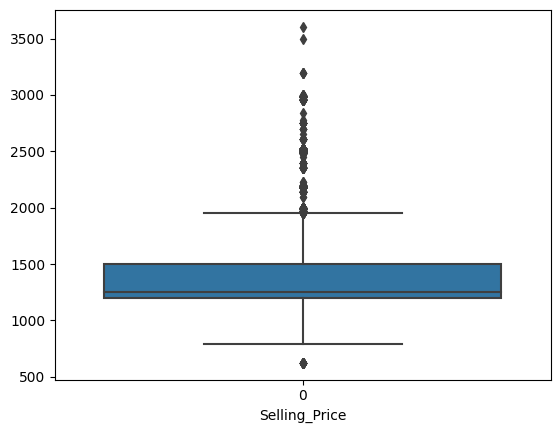

In [ ]:
sns.boxplot(df['engine'])
plt.xlabel('Selling_Price')

In [ ]:
df.dropna(inplace=True, axis=0, how='any') #dropping duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

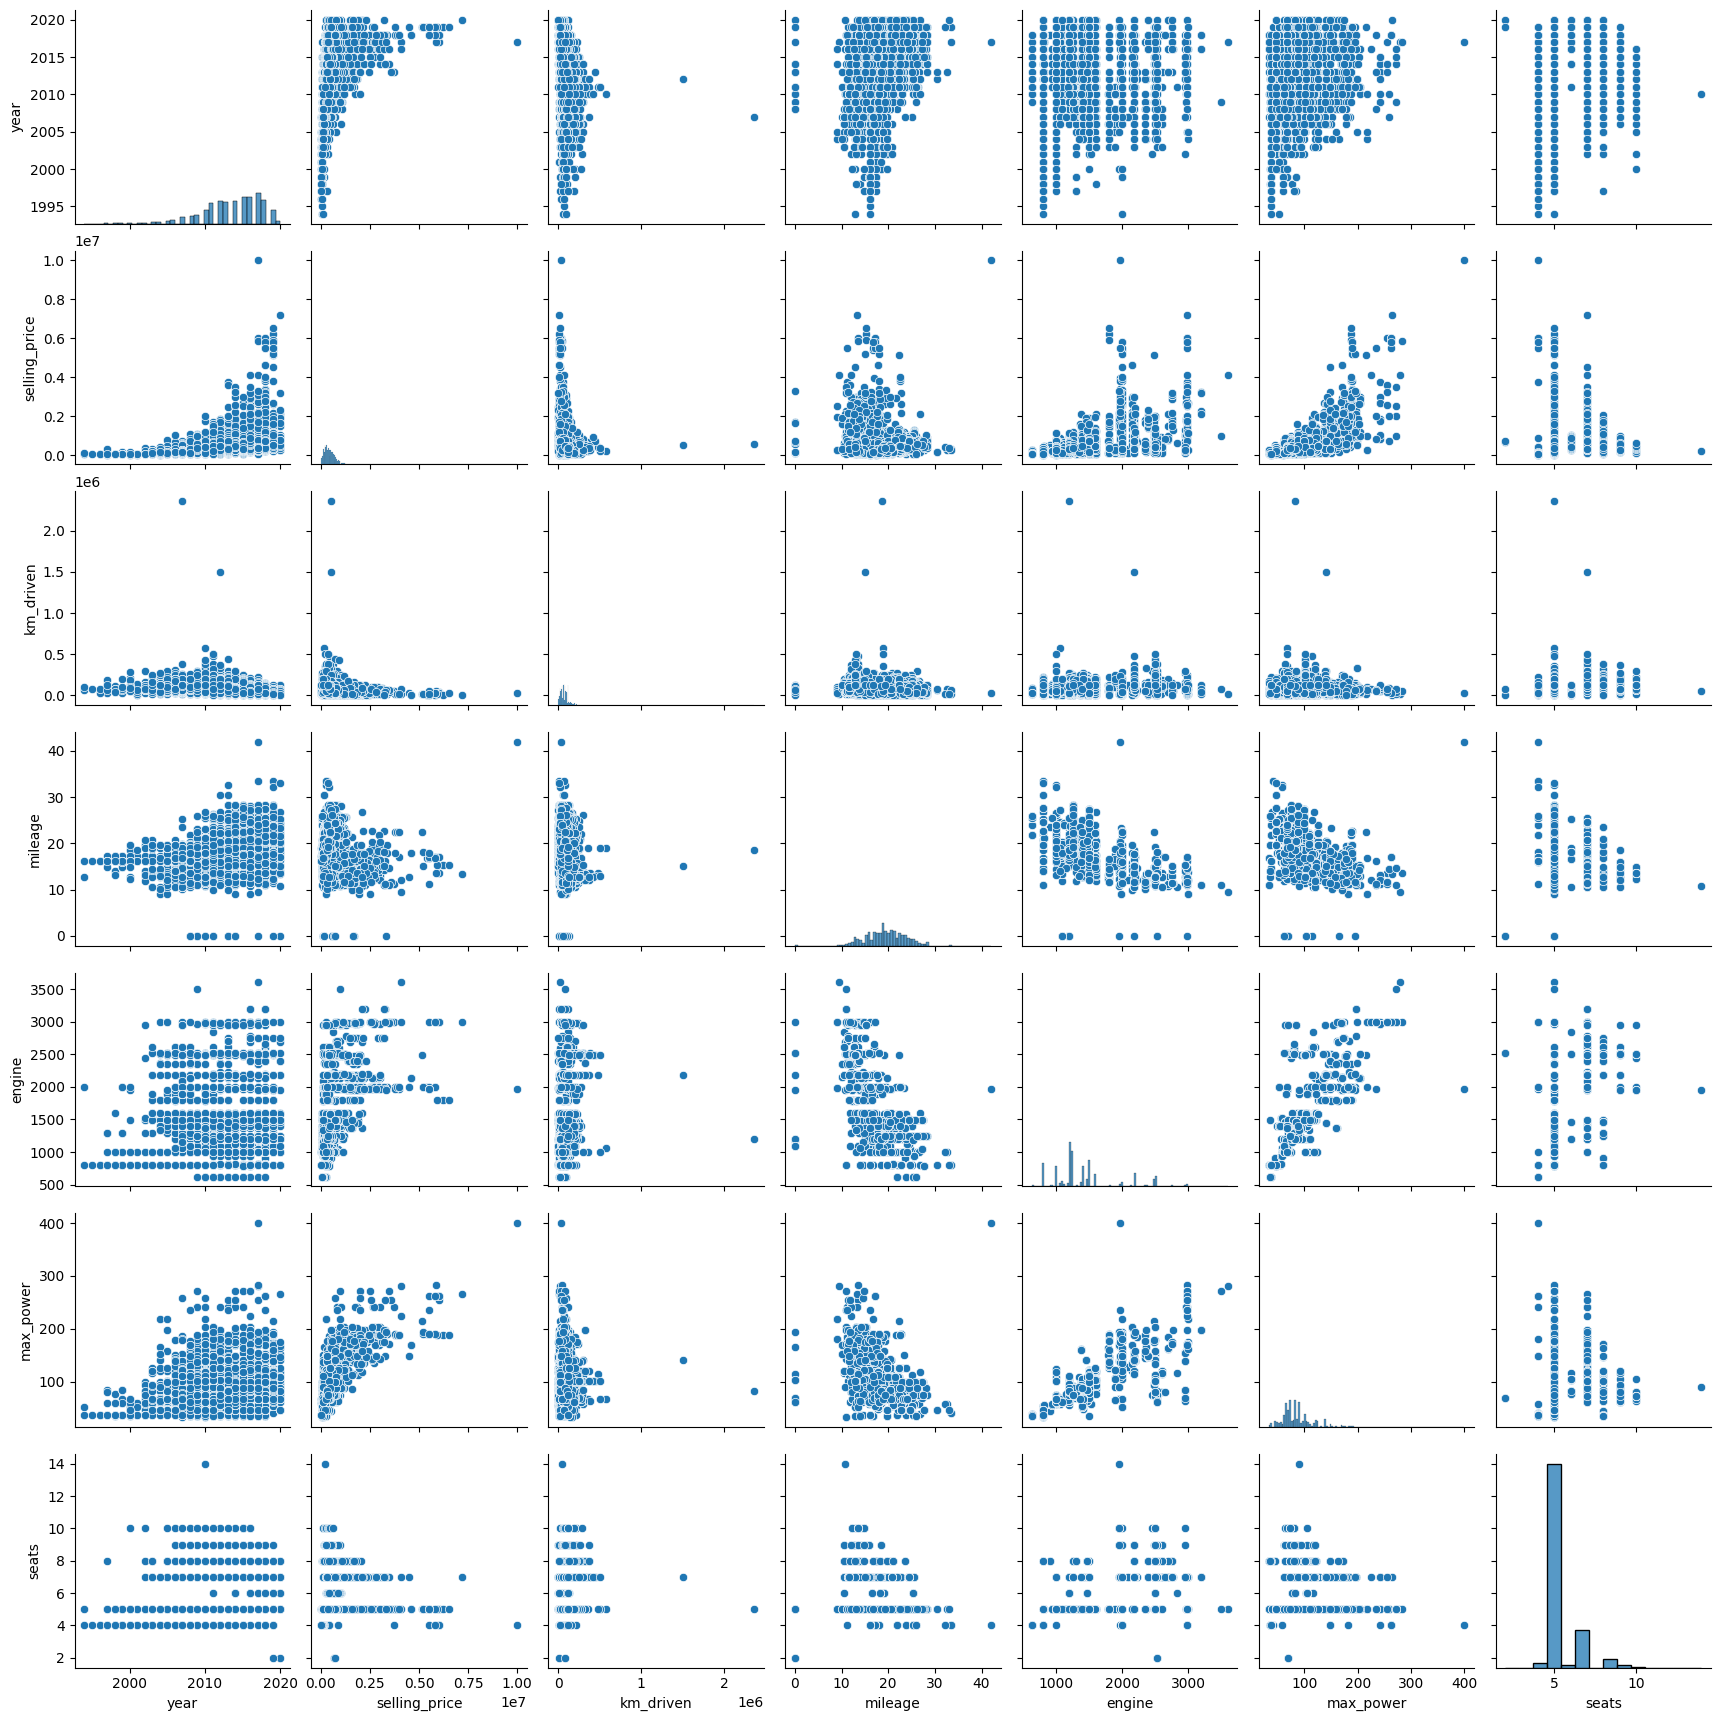

In [ ]:
sns.pairplot(df)


<Axes: xlabel='selling_price', ylabel='year'>

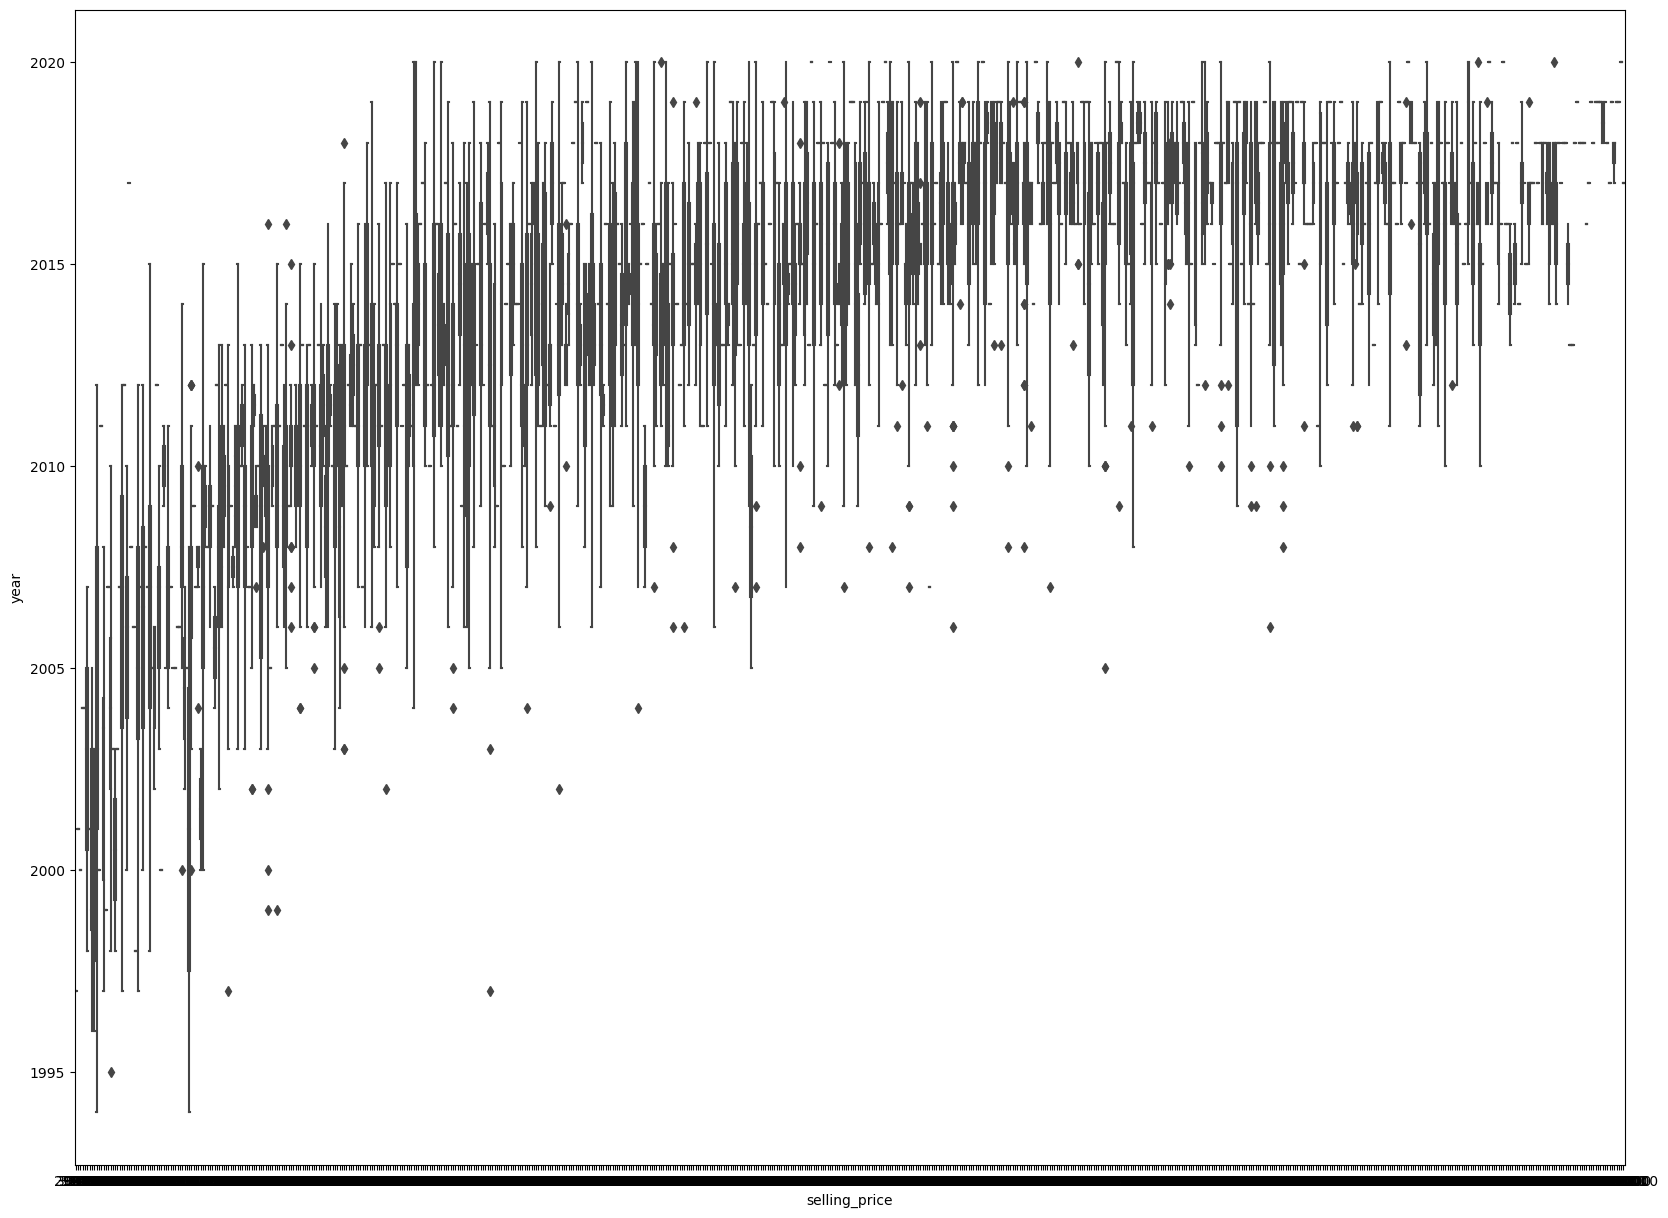

In [ ]:
plt.subplots(figsize=(20,15))           #box plot of selling_price against year
sns.boxplot(x='selling_price',y='year',data=df)

In [ ]:
x=df.drop(['selling_price','name','fuel','seller_type','transmission','owner','mileage','torque','engine','max_power'],axis=1)#removing unnecesary values
y=df['selling_price']


In [ ]:
x=pd.get_dummies(x,columns=['fuel','seller_type','transmission','owner'],\
                 prefix=['fuel','seller_type','transmission','owner'],drop_first=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
#importing model train and test functions
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) #setting test size(percentage of total dataset for testing, rest is used for training)
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (4701, 3)
x_test shape (2016, 3)
y_train shape (4701,)
y_test shape (2016,)


In [ ]:
from sklearn.linear_model import LinearRegression #importing linear regression


In [ ]:
linmodel = LinearRegression()     #assigning variable for linear regression

In [ ]:
linmodel.fit(x_train,y_train)    #fitting

LinearRegression()

In [ ]:
print(linmodel.score(x_train,y_train))   #printing accuracy score

0.2110765871452518


In [ ]:
predictions = linmodel.predict(x_test)  #predicting values using x_text scores

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))  #printing root mean square error values
print('R-squared:',r2_score(y_test,predictions))     #Printing R squared values

RMSE: 478561.9298985883
R-squared: 0.18982986082520958


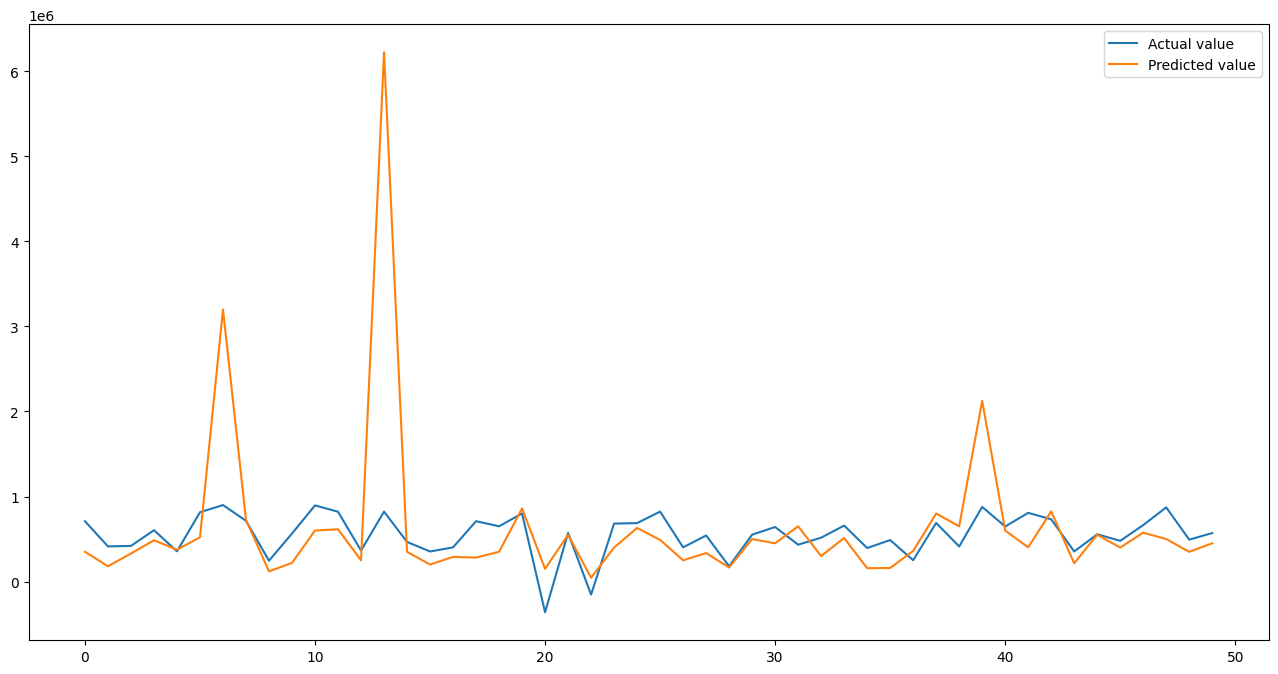

In [ ]:
#plotting predicted vs actual values
test = pd.DataFrame({'Predicted value':predictions,'Actual value':y_test})
fig=plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


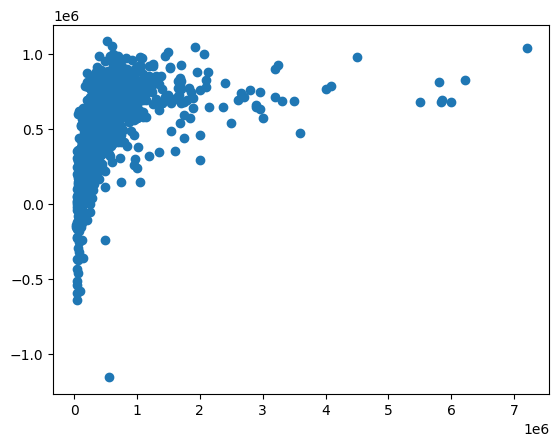

In [ ]:
plt.scatter(y_test,predictions) #scattered graph